# Analysis of GEOS-Chem Modelled PM2.5 Over UK 

In [1]:
# import packages 
import xarray as xr
import pandas
import os
import glob
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs

%matplotlib inline
import matplotlib.pyplot as plt
from gamap_colormap import WhGrYlRd
from ipywidgets import interact, IntSlider, SelectionSlider, Dropdown


In [2]:
# read data from shapefile
UK_boundary = gpd.read_file('D:\Jupyter code\gadm40_GBR_shp\gadm40_GBR_1.shp')
UK_city = gpd.read_file('D:\Jupyter code\gadm36_GBR_shp\gadm36_GBR_2.shp') 

In [6]:
# find the index of London in UK_city shapefile
London = UK_city[UK_city['NAME_2']=="Greater London"]
print(London)

   GID_0          NAME_0    GID_1   NAME_1 NL_NAME_1       GID_2  \
35   GBR  United Kingdom  GBR.1_1  England      None  GBR.1.36_1   

            NAME_2 VARNAME_2 NL_NAME_2  TYPE_2 ENGTYPE_2  CC_2 HASC_2  \
35  Greater London      None      None  Region    Region  None  GB.GL   

                                             geometry  
35  POLYGON ((0.16627 51.39856, 0.16917 51.38861, ...  


In [4]:
Lon_boundary = UK_city.geometry[35]

In [5]:
# convert xarray data arrays to a single pandas dataframe 
def xr_to_df(data):
    data = data.to_dataframe()
    data.reset_index(inplace=True)
    return data

In [7]:
# import UK_land_mask and select main areas
GC = xr.open_dataset("D:/Jupyter code/uk-land-mask-025x03125.nc")
pandas.set_option('display.max_rows', None) # show all lines in display
# display(GC)

# delete values of GC["uk-mask"]=0 to avoid errors(including sea areas) in calculating mean() value below
GC = GC.where(GC["uk-mask"].values != 0) 
# display(GC)

# select main areas' values
GC_land = GC.sel(lat=slice(49.25,59.5),lon=slice(-9.375,2.188))
GC_ire=GC.sel(lat=slice(54,55.3),lon=slice(-8.2,-5.4))
GC_n=GC.sel(lat=slice(54,56),lon=slice(-5.2,0))
GC_sw=GC.sel(lat=slice(49.9,54),lon=slice(-5.8,-1.9))
GC_se=GC.sel(lat=slice(49.9,54),lon=slice(-1.9,1.8))

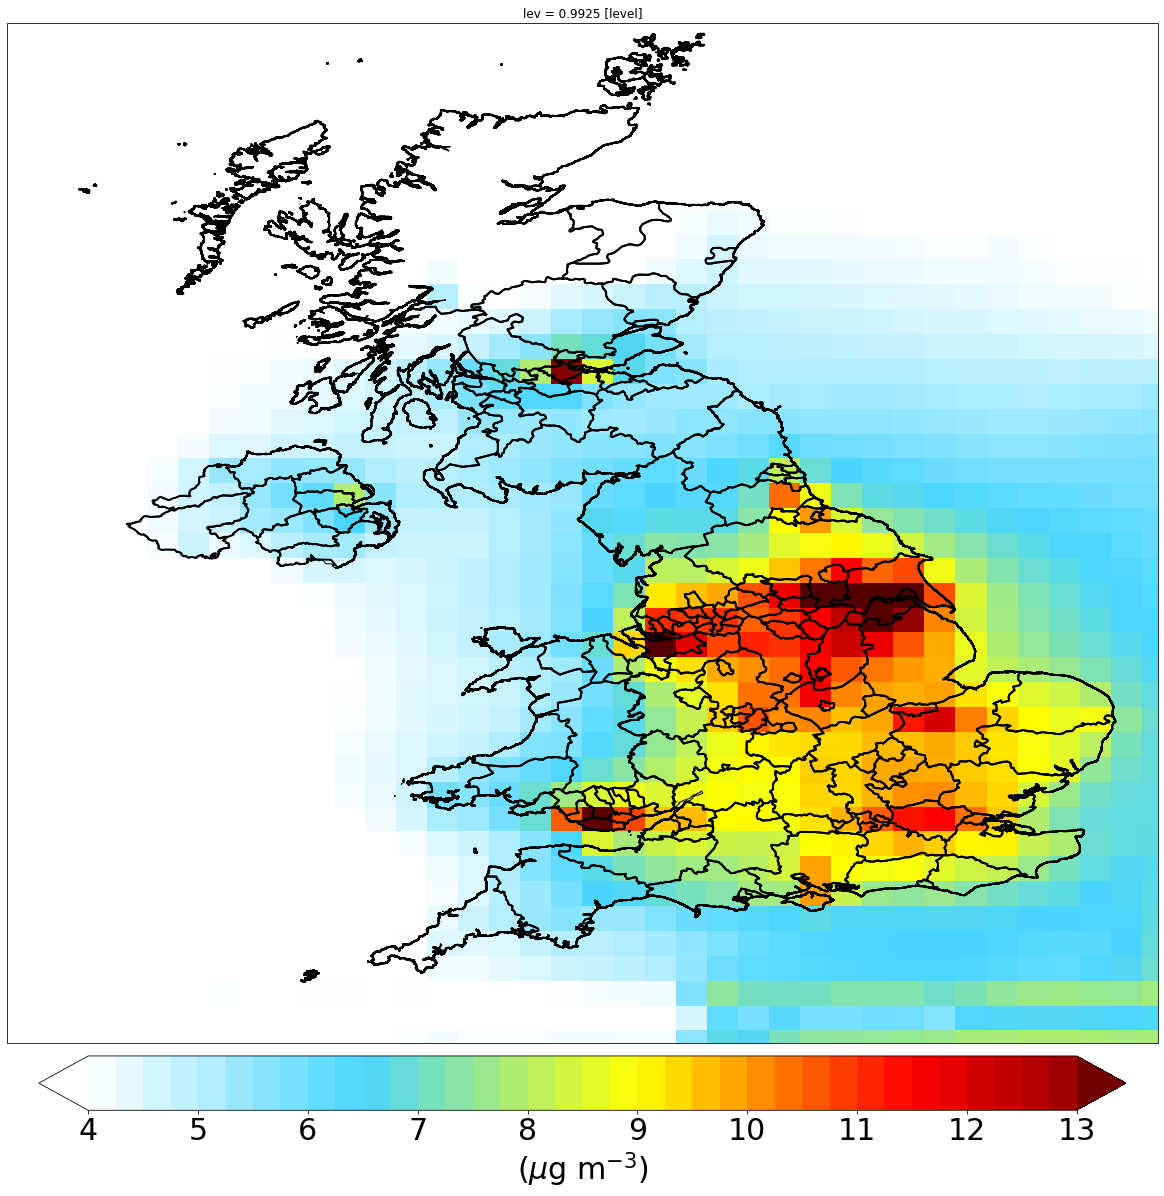

In [5]:
## Compare with Jamie Kelly
os.chdir("D:/Jupyter code/baseline_uk_nest")

# read data
Species  = sorted(glob.glob("GEOSChem.SpeciesConc*.nc4"))

# extract data fields from GC output files
Species  = [xr.open_dataset(file) for file in Species]
# display(Species[0])

# surface layer data
SO4= [data['SpeciesConc_SO4'].isel(time=0,lev=0) for data in Species]
NIT= [data['SpeciesConc_NIT'].isel(time=0,lev=0) for data in Species]
NH4= [data['SpeciesConc_NH4'].isel(time=0,lev=0) for data in Species]
BCPO= [data['SpeciesConc_BCPO'].isel(time=0,lev=0) for data in Species]
BCPI= [data['SpeciesConc_BCPI'].isel(time=0,lev=0) for data in Species]
OCPO= [data['SpeciesConc_OCPO'].isel(time=0,lev=0) for data in Species]
OCPI= [data['SpeciesConc_OCPI'].isel(time=0,lev=0) for data in Species]
SALA= [data['SpeciesConc_SALA'].isel(time=0,lev=0) for data in Species]
DST1= [data['SpeciesConc_DST1'].isel(time=0,lev=0) for data in Species]
DST2= [data['SpeciesConc_DST2'].isel(time=0,lev=0) for data in Species]
SOAS= [data['SpeciesConc_SOAS'].isel(time=0,lev=0) for data in Species]
# display(NH4)

# parameters for concentration unit conversion 
STP_P = 101325 # standard P
STP_T = 293.    # standard T; 20 degC
ppm_mgm3 = 1/ 22.4 * 273 / STP_T* STP_P/ 101325  # 1μmol/mol = 1ppm = 1000ppb  1mol/mol = 1*10e3 mmol/mol  1ppm=1.0e-6mol/mol
diag_MWs = [96.06, 62.01, 18.05, 12.01, 12.01, 12.01, 12.01, 31.4,29.0,29.0, 150.0]

# convert unit for gases (dry mol/mol to μg/m3)
SO4= [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in SO4]
NIT= [1 * 1.0e9 * var * 62.01 * ppm_mgm3 for var in NIT]
NH4= [1 * 1.0e9 * var * 18.05 * ppm_mgm3 for var in NH4]
BCPO= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in BCPO]
BCPI= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in BCPI]
OCPO= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in OCPO]
OCPI= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in OCPI]
SALA= [1 * 1.0e9 * var * 31.4 * ppm_mgm3 for var in SALA]
DST1= [1 * 1.0e9 * var * 29.0 * ppm_mgm3 for var in DST1]
DST2= [1 * 1.0e9 * var * 29.0 * ppm_mgm3 for var in DST2]
SOAS= [1 * 1.0e9 * var * 150.0 * ppm_mgm3 for var in SOAS]
# display(SO4)

# calculate averages 
SO4_ave = sum(SO4)/len(SO4)
NIT_ave = sum(NIT)/len(NIT)
NH4_ave = sum(NH4)/len(NH4)
BCPO_ave = sum(BCPO)/len(BCPO)
BCPI_ave = sum(BCPI)/len(BCPI)
OCPO_ave = sum(OCPO)/len(OCPO)
OCPI_ave = sum(OCPI)/len(OCPI)
SALA_ave = sum(SALA)/len(SALA)
DST1_ave = sum(DST1)/len(DST1)
DST2_ave = sum(DST2)/len(DST2)
SOAS_ave = sum(SOAS)/len(SOAS)
# print(SO4_ave)

# http://wiki.seas.harvard.edu/geos-chem/index.php/Particulate_matter_in_GEOS-Chem
PM25= ( NH4_ave + NIT_ave  + SO4_ave ) * 1.35 + BCPI_ave + BCPO_ave  +( OCPO_ave + ( OCPI_ave * 1.07 ) ) * 2.1 + \
DST1_ave + DST2_ave * 0.30 + SALA_ave * 1.86  + SOAS_ave  * 1.07

# visualize data on UK
fig = plt.figure(figsize=[40,20])
ax = plt.axes(projection=ccrs.Mercator())
ax.add_geometries(UK_boundary.geometry, crs=ccrs.Mercator(),edgecolor='black',facecolor='none', zorder=1)
ax.add_geometries(UK_city.geometry, crs=ccrs.Mercator(),edgecolor='black',facecolor='none',linewidth=2, zorder=1)
### show Location of London over UK map ( created by polygon )
#ax.add_geometries(Lon_grids, crs=ccrs.PlateCarree(),edgecolor='DarkOrchid',facecolor='none',linewidth=7,zorder=1)

# plot baseline_UK_nest PM2.5 data from model 
PM25.plot(ax=ax,cmap=WhGrYlRd,vmin=4,vmax=14,zorder=0) # color schme: https://www.cnblogs.com/ceason/articles/14177807.html
ax.set(xlim=(-9.375,2.188),ylim=(49.25,59.5))

# insert title and text
# ax.set_title('PM$_\mathregular{2.5}$_baseline',fontsize=60,weight='bold', pad=20)
ax.set_title("  ")
# set colorbar
PCM=ax.get_children()[2]
bounds = np.arange(4,13.25,0.25)
colorbar = plt.colorbar(PCM,ax=ax,label='($\mu$g m$^{-3}$)',orientation='horizontal',fraction=0.05,shrink=1,pad=0.012,extend = 'both',boundaries=bounds)
colorbar.set_ticks([4,5,6,7,8,9,10,11,12,13])
colorbar.ax.tick_params(labelsize=30) 
colorbar.ax.xaxis.label.set_size(30)

# add lines to color bar
# for x in np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
#     colorbar.ax.axvline(x,ymin=0, ymax=1,linewidth=1, color='black')

# set the border width globally
plt.rcParams['axes.linewidth'] = 3

# remove the unwanted colorbar that comes by default
plt.delaxes(fig.axes[1])
fig.savefig('D:/Jupyter code/PM output/1.png', dpi=100, bbox_inches='tight')

In [82]:
# find current path
retval = os.getcwd()
# print ("current path: %s" % retval)

# change path
os.chdir("D:/Jupyter code/baseline_uk_nest")

# read data
Species  = sorted(glob.glob("GEOSChem.SpeciesConc*.nc4"))

# extract data fields from GC output files
Species  = [xr.open_dataset(file) for file in Species]
# display(Species[0])

# surface layer data
SO4= [data['SpeciesConc_SO4'].isel(time=0,lev=0) for data in Species]
NIT= [data['SpeciesConc_NIT'].isel(time=0,lev=0) for data in Species]
NH4= [data['SpeciesConc_NH4'].isel(time=0,lev=0) for data in Species]
BCPO= [data['SpeciesConc_BCPO'].isel(time=0,lev=0) for data in Species]
BCPI= [data['SpeciesConc_BCPI'].isel(time=0,lev=0) for data in Species]
OCPO= [data['SpeciesConc_OCPO'].isel(time=0,lev=0) for data in Species]
OCPI= [data['SpeciesConc_OCPI'].isel(time=0,lev=0) for data in Species]
SALA= [data['SpeciesConc_SALA'].isel(time=0,lev=0) for data in Species]
DST1= [data['SpeciesConc_DST1'].isel(time=0,lev=0) for data in Species]
DST2= [data['SpeciesConc_DST2'].isel(time=0,lev=0) for data in Species]
SOAS= [data['SpeciesConc_SOAS'].isel(time=0,lev=0) for data in Species]
# display(NH4)

# parameters for concentration unit conversion 
STP_P = 101325 # standard P
STP_T = 293.    # standard T; 20 deg C
ppm_mgm3 = 1/ 22.4 * 273 / STP_T* STP_P/ 101325  # 1μmol/mol = 1ppm = 1000ppb      1mol/mol = 1*10e3 mmol/mol  1ppm=1.0e-6mol/mol
diag_MWs = [96.06, 62.01, 18.05, 12.01, 12.01, 12.01, 12.01, 31.4, 29.0, 29.0, 150.0]

# convert unit for gases (dry mol/mol to μg/m3)
SO4= [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in SO4]
NIT= [1 * 1.0e9 * var * 62.01 * ppm_mgm3 for var in NIT]
NH4= [1 * 1.0e9 * var * 18.05 * ppm_mgm3 for var in NH4]
BCPO= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in BCPO]
BCPI= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in BCPI]
OCPO= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in OCPO]
OCPI= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in OCPI]
SALA= [1 * 1.0e9 * var * 31.4 * ppm_mgm3 for var in SALA]
DST1= [1 * 1.0e9 * var * 29.0 * ppm_mgm3 for var in DST1]
DST2= [1 * 1.0e9 * var * 29.0 * ppm_mgm3 for var in DST2]
SOAS= [1 * 1.0e9 * var * 150.0 * ppm_mgm3 for var in SOAS]
# display(SO4)

# calculate averages 
SO4_ave = sum(SO4)/len(SO4)
NIT_ave = sum(NIT)/len(NIT)
NH4_ave = sum(NH4)/len(NH4)
BCPO_ave = sum(BCPO)/len(BCPO)
BCPI_ave = sum(BCPI)/len(BCPI)
OCPO_ave = sum(OCPO)/len(OCPO)
OCPI_ave = sum(OCPI)/len(OCPI)
SALA_ave = sum(SALA)/len(SALA)
DST1_ave = sum(DST1)/len(DST1)
DST2_ave = sum(DST2)/len(DST2)
SOAS_ave = sum(SOAS)/len(SOAS)
# print(SO4_ave)

# http://wiki.seas.harvard.edu/geos-chem/index.php/Particulate_matter_in_GEOS-Chem
PM25 = ( NH4_ave + NIT_ave  + SO4_ave ) * 1.35 + BCPI_ave + BCPO_ave  +( OCPO_ave + ( OCPI_ave * 1.07 ) ) * 2.1 + \
DST1_ave + DST2_ave * 0.30 + SALA_ave * 1.86  + SOAS_ave  * 1.07
# PM25_cle = ( NH4_ave + NIT_ave  + SO4_ave ) * 1.35 + BCPI_ave + BCPO_ave  +( OCPO_ave + ( OCPI_ave * 1.07 ) ) * 2.1 + \
# DST1_ave + DST2_ave * 0.30 + SALA_ave * 1.86  + SOAS_ave  * 1.07
# PM25_mtf = ( NH4_ave + NIT_ave  + SO4_ave ) * 1.35 + BCPI_ave + BCPO_ave  +( OCPO_ave + ( OCPI_ave * 1.07 ) ) * 2.1 + \
# DST1_ave + DST2_ave * 0.30 + SALA_ave * 1.86  + SOAS_ave  * 1.07

# visualize data on UK
fig = plt.figure(figsize=[30,20])
ax = plt.axes(projection=ccrs.Mercator())
ax.add_geometries(UK_boundary.geometry, crs=ccrs.Mercator(),edgecolor='black',facecolor='none', zorder=1)
ax.add_geometries(UK_city.geometry, crs=ccrs.Mercator(),edgecolor='black',facecolor='none',linewidth=2, zorder=1)

# # plot baseline_UK_nest PM2.5 data from model 
PM25.plot(ax=ax,cmap=WhGrYlRd,vmin=4,vmax=18,zorder=0) # color schme: https://www.cnblogs.com/ceason/articles/14177807.html
ax.set(xlim=(-9.375,2.188),ylim=(49.25,59.5))

# insert title and text
ax.set_title("mtf",fontsize=60,weight='bold', pad=20)

# set colorbar
PCM=ax.get_children()[2]
bounds = np.arange(4,18.25,0.25)
colorbar = plt.colorbar(PCM,ax=ax,label='($\mu$g m$^{-3}$)',orientation='horizontal',shrink=1,pad=0.05,extend = 'both', boundaries=bounds)
colorbar.set_ticks([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
colorbar.ax.tick_params(labelsize=10) 
colorbar.ax.xaxis.label.set_size(10)

# add lines to color bar
for x in np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]):
    colorbar.ax.axvline(x,ymin=0, ymax=1,linewidth=1, color='black')

# set the border width globally
plt.rcParams['axes.linewidth'] =3


# remove the unwanted colorbar that comes by default
plt.delaxes(fig.axes[1])

# turn on this to save out without the legend
plt.delaxes(fig.axes[-1])

# turn on this to generate the legend only
# plt.delaxes(fig.axes[0])

# add area demarcation lines
start_lon =1.8
end_lon=1.8
start_lat=49.9
end_lat=54
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-8.2
end_lon=1.8
start_lat=54
end_lat=54
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-5.8
end_lon=1.8
start_lat=49.9
end_lat=49.9
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-5.8
end_lon=-5.8
start_lat=54
end_lat=49.9
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-1.9
end_lon=-1.9
start_lat=54
end_lat=49.9
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-8.2
end_lon=-8.2
start_lat=54
end_lat=55.3
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-8.2
end_lon=-5.4
start_lat=55.3
end_lat=55.3
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-5.4
end_lon=-5.4
start_lat=55.3
end_lat=54
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =-5.2
end_lon=-5.2
start_lat=54
end_lat=56
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =0
end_lon=0
start_lat=54
end_lat=56
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
start_lon =0
end_lon=-5.2
start_lat=56
end_lat=56
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)

# calculate mean PM2.5 in each area
PM25_land= PM25*GC_land["uk-mask"]
PM25_ire= PM25*GC_ire["uk-mask"]
PM25_n= PM25*GC_n["uk-mask"]
PM25_sw= PM25*GC_sw["uk-mask"]
PM25_se= PM25*GC_se["uk-mask"]
PM25_land=PM25_land.mean().values
PM25_ire= PM25_ire.mean().values
PM25_n= PM25_n.mean().values
PM25_sw= PM25_sw.mean().values
PM25_se= PM25_se.mean().values
PM25_land=('%.1f' %PM25_land)
PM25_ire=('%.1f' %PM25_ire)
PM25_n=('%.1f' %PM25_n)
PM25_sw=('%.1f' %PM25_sw)
PM25_se=('%.1f' %PM25_se)
ax.text(-0.4,58.9,f'UK: {PM25_land}',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-9.1,53.6,f'N.Ireland: {PM25_ire}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-1.8,56.2,f'N.England: {PM25_n}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-1,49.5,f'SE UK: {PM25_se}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-5.5,49.5,f'SW UK: {PM25_sw}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))

# save the figure in png.
fig.savefig('D:/Jupyter code/PM output/mtf_uk_nest.png', dpi=100, bbox_inches='tight')

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_dr_test['poly'][[i]] = create_poly(PM25_dr_test['lon'][[i]],PM25_dr_test['lat'][[i]])
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoS

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = gpd.GeoSeries(cascaded_union(poly))
C:\Users\Evan\AppData\Local\Temp\ipykernel_3528\463878167.py:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unar

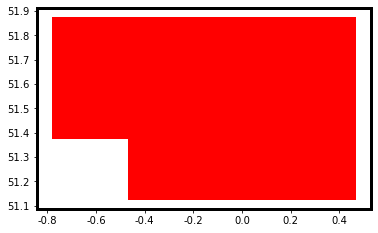

10.160301208496094

In [83]:
## Focus on London and calculate annual mean PM2.5 over London

# rename the xarray dataset
PM25= PM25.rename("PM25")

# convert xarray to pandas dataframe 
PM25_df = xr_to_df(PM25)

# get a copy of full data over PM25_df
PM25_dr_test = PM25_df.copy()

# for each GEOS-Chem grid, we can create its polygon based on centre coordinates and model resolution
def create_poly(lon,lat):
    from shapely import geometry
    from shapely.ops import cascaded_union
    p1 = geometry.Point(lon-0.3125/2,lat-0.25/2)
    p2 = geometry.Point(lon+0.3125/2,lat-0.25/2)
    p3 = geometry.Point(lon+0.3125/2,lat+0.25/2)
    p4 = geometry.Point(lon-0.3125/2,lat+0.25/2)
    pointList = [p1, p2, p3, p4, p1]
    poly = geometry.Polygon([[p.x, p.y] for p in pointList])
    poly = gpd.GeoSeries(cascaded_union(poly))
    return poly

# for each grid, test if its polygon overlaps with the London boundary
PM25_dr_test['poly'] = np.nan

for i in range(PM25_dr_test.shape[0]):
    PM25_dr_test['poly'][[i]] = create_poly(PM25_dr_test['lon'][[i]],PM25_dr_test['lat'][[i]])
    
PM25_dr_test['poly_group'] = np.nan

for i in range(PM25_dr_test.shape[0]):
    PM25_dr_test['poly_group'][[i]] = gpd.GeoSeries(PM25_dr_test['poly'][[i]]).intersects(Lon_boundary)
    
# only keep those over London
PM25_dr_test = PM25_dr_test[PM25_dr_test['poly_group'] == True]
PM25_dr_test = PM25_dr_test.reset_index(drop=True)

# combine the 9 grids into one shape
from shapely.ops import cascaded_union
Lon_grids = gpd.GeoSeries(cascaded_union(PM25_dr_test['poly']))
Lon_grids.plot(color = 'red')
plt.show()

# calculate mean PM2.5 over these grids
PM25_dr_test['PM25'].mean()

In [22]:
##### Calculate annual mean PM2.5 over heavily polluted areas

# change path
os.chdir("D:/Jupyter code/baseline_uk_nest")

# read data
Species_p = sorted(glob.glob("GEOSChem.SpeciesConc*.nc4"))

# extract data fields from GC output files
Species_p  = [xr.open_dataset(file) for file in Species_p]

# surface layer data
SO4_p= [data['SpeciesConc_SO4'].isel(time=0,lev=0) for data in Species_p]
NIT_p= [data['SpeciesConc_NIT'].isel(time=0,lev=0) for data in Species_p]
NH4_p= [data['SpeciesConc_NH4'].isel(time=0,lev=0) for data in Species_p]
BCPO_p= [data['SpeciesConc_BCPO'].isel(time=0,lev=0) for data in Species_p]
BCPI_p= [data['SpeciesConc_BCPI'].isel(time=0,lev=0) for data in Species_p]
OCPO_p= [data['SpeciesConc_OCPO'].isel(time=0,lev=0) for data in Species_p]
OCPI_p= [data['SpeciesConc_OCPI'].isel(time=0,lev=0) for data in Species_p]
SALA_p= [data['SpeciesConc_SALA'].isel(time=0,lev=0) for data in Species_p]
DST1_p= [data['SpeciesConc_DST1'].isel(time=0,lev=0) for data in Species_p]
DST2_p= [data['SpeciesConc_DST2'].isel(time=0,lev=0) for data in Species_p]
SOAS_p= [data['SpeciesConc_SOAS'].isel(time=0,lev=0) for data in Species_p]
# display(NH4_mtf)

# parameters for concentration unit conversion 
STP_P = 101325 # standard P
STP_T = 293.    # standard T; 20 deg C
ppm_mgm3 = 1/ 22.4 * 273 / STP_T* STP_P/ 101325  # 1μmol/mol = 1ppm = 1000ppb      1mol/mol = 1*10e3 mmol/mol  1ppm=1.0e-6mol/mol
diag_MWs = [96.06, 62.01, 18.05, 12.01, 12.01, 12.01, 12.01, 31.4,29.0,29.0, 150.0]

# convert unit for gases (dry mol/mol to μg/m3)
SO4_p= [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in SO4_p]
NIT_p= [1 * 1.0e9 * var * 62.01 * ppm_mgm3 for var in NIT_p]
NH4_p= [1 * 1.0e9 * var * 18.05 * ppm_mgm3 for var in NH4_p]
BCPO_p= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in BCPO_p]
BCPI_p= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in BCPI_p]
OCPO_p= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in OCPO_p]
OCPI_p= [1 * 1.0e9 * var * 12.01 * ppm_mgm3 for var in OCPI_p]
SALA_p= [1 * 1.0e9 * var * 31.4 * ppm_mgm3 for var in SALA_p]
DST1_p= [1 * 1.0e9 * var * 29.0 * ppm_mgm3 for var in DST1_p]
DST2_p= [1 * 1.0e9 * var * 29.0 * ppm_mgm3 for var in DST2_p]
SOAS_p= [1 * 1.0e9 * var * 150.0 * ppm_mgm3 for var in SOAS_p]
# display(SO4_cle)

# calculate averages 
SO4_ave_p = sum(SO4_p)/len(SO4_p)
NIT_ave_p = sum(NIT_p)/len(NIT_p)
NH4_ave_p = sum(NH4_p)/len(NH4_p)
BCPO_ave_p = sum(BCPO_p)/len(BCPO_p)
BCPI_ave_p = sum(BCPI_p)/len(BCPI_p)
OCPO_ave_p = sum(OCPO_p)/len(OCPO_p)
OCPI_ave_p = sum(OCPI_p)/len(OCPI_p)
SALA_ave_p = sum(SALA_p)/len(SALA_p)
DST1_ave_p = sum(DST1_p)/len(DST1_p)
DST2_ave_p = sum(DST2_p)/len(DST2_p)
SOAS_ave_p = sum(SOAS_p)/len(SOAS_p)
# print(SO4_ave_mtf)

# http://wiki.seas.harvard.edu/geos-chem/index.php/Particulate_matter_in_GEOS-Chem
PM25_p= ( NH4_ave_p + NIT_ave_p  + SO4_ave_p ) * 1.35 + BCPI_ave_p + BCPO_ave_p  +( OCPO_ave_p + ( OCPI_ave_p * 1.07 ) ) * 2.1 + \
DST1_ave_p + DST2_ave_p * 0.30 + SALA_ave_p * 1.86  + SOAS_ave_p  * 1.07

# calculate heavily polluted area mean PM2.5 data from model 
# PM25_p=PM25_p.sel(lat=slice(53.5,53.9),lon=slice(-1.3125,-0.2)) ### B
# PM25_p=PM25_p.sel(lat=slice(53.2,53.3),lon=slice(-2.875,-2.5)) ### C
# PM25_p=PM25_p.sel(lat=slice(56,56),lon=slice(-3.75,-3.75)) ### A
PM25_p=PM25_p.sel(lat=slice(51.5,51.5),lon=slice(-3.4375,-3.4375)) ### D
PM25_p= PM25_p.rename("PM25_p")
PM25_p_df = xr_to_df(PM25_p)
print(PM25_p_df.mean())



lat       51.500000
lon       -3.437500
lev        0.992500
PM25_p    13.870238
dtype: float64


In [36]:
## calculate the monthly change over London and highly polluted areas

# change path
os.chdir("D:/Jupyter code/mtf_uk_nest")

# read data
Species  = sorted(glob.glob("GEOSChem.SpeciesConc*.nc4"))

# extract data fields from GC output files
Species  = [xr.open_dataset(file) for file in Species]
# display(Species[0]['SpeciesConc_SO4'])

# store 12 monthly PM2.5 over London
PM25_Monthly_Lon=[]
for m in range(1,13):
    # read data for m month in Specoes 
    SO4= Species[m-1]['SpeciesConc_SO4'].isel(time=0,lev=0) 
    NIT= Species[m-1]['SpeciesConc_NIT'].isel(time=0,lev=0) 
    NH4= Species[m-1]['SpeciesConc_NH4'].isel(time=0,lev=0) 
    BCPO= Species[m-1]['SpeciesConc_BCPO'].isel(time=0,lev=0)
    BCPI= Species[m-1]['SpeciesConc_BCPI'].isel(time=0,lev=0) 
    OCPO= Species[m-1]['SpeciesConc_OCPO'].isel(time=0,lev=0) 
    OCPI= Species[m-1]['SpeciesConc_OCPI'].isel(time=0,lev=0)
    SALA= Species[m-1]['SpeciesConc_SALA'].isel(time=0,lev=0) 
    DST1= Species[m-1]['SpeciesConc_DST1'].isel(time=0,lev=0) 
    DST2= Species[m-1]['SpeciesConc_DST2'].isel(time=0,lev=0) 
    SOAS= Species[m-1]['SpeciesConc_SOAS'].isel(time=0,lev=0)

    # parameters for concentration unit conversion 
    STP_P = 101325 # standard P
    STP_T = 293.    # standard T; 20 deg C
    ppm_mgm3 = 1/ 22.4 * 273 / STP_T* STP_P/ 101325  # 1μmol/mol = 1ppm = 1000ppb      1mol/mol = 1*10e3 mmol/mol  1ppm=1.0e-6mol/mol
    diag_MWs = [96.06, 62.01, 18.05, 12.01, 12.01, 12.01, 12.01, 31.4,29.0,29.0, 150.0]

    # convert unit for gases (dry mol/mol to μg/m3)
    SO4= 1 * 1.0e9 * SO4 * 96.06 * ppm_mgm3
    NIT= 1 * 1.0e9 * NIT * 62.01 * ppm_mgm3 
    NH4= 1 * 1.0e9 * NH4 * 18.05 * ppm_mgm3 
    BCPO= 1 * 1.0e9 * BCPO * 12.01 * ppm_mgm3 
    BCPI= 1 * 1.0e9 * BCPI * 12.01 * ppm_mgm3 
    OCPO= 1 * 1.0e9 * OCPO * 12.01 * ppm_mgm3 
    OCPI= 1 * 1.0e9 * OCPI * 12.01 * ppm_mgm3 
    SALA= 1 * 1.0e9 * SALA * 31.4 * ppm_mgm3 
    DST1= 1 * 1.0e9 * DST1 * 29.0 * ppm_mgm3 
    DST2= 1 * 1.0e9 * DST2 * 29.0 * ppm_mgm3 
    SOAS= 1 * 1.0e9 * SOAS * 150.0 * ppm_mgm3 

    PM25= ( NH4 + NIT + SO4 ) * 1.35 + BCPI + BCPO +( OCPO + ( OCPI * 1.07 ) ) * 2.1 + \
    DST1 + DST2 * 0.30 + SALA * 1.86  + SOAS * 1.07
    
    # find PM2.5 over heavily polluted areas
#     PM25=PM25.sel(lat=slice(56,56),lon=slice(-3.75,-3.75)) ### A
#     PM25=PM25.sel(lat=slice(53.5,53.9),lon=slice(-1.3125,-0.2)) ### B
#     PM25=PM25.sel(lat=slice(53.2,53.3),lon=slice(-2.875,-2.5)) ### C
    PM25=PM25.sel(lat=slice(51.5,51.5),lon=slice(-3.4375,-3.4375)) ### D
    
    # convert xarray data arrays to a single pandas dataframe （PM2.5)    
    PM25= PM25.rename("PM25")
    PM25_df = xr_to_df(PM25)
#     n=PM25_df["PM25"].values
    n=PM25_df['PM25'].mean()
#     print(n)

#     # get a copy of full data over PM25_change_dr
#     PM25_dr_test = PM25_df.copy()

#     # for each grid, test if its polygon overlaps with the London boundary
#     PM25_dr_test['poly'] = np.nan

#     for i in range(PM25_dr_test.shape[0]):
#         PM25_dr_test['poly'][[i]] = create_poly(PM25_dr_test['lon'][[i]],PM25_dr_test['lat'][[i]])
    
#     PM25_dr_test['poly_group'] = np.nan

#     for i in range(PM25_dr_test.shape[0]):
#         PM25_dr_test['poly_group'][[i]] = gpd.GeoSeries(PM25_dr_test['poly'][[i]]).intersects(Lon_boundary)
    
#     # only keep those over London
#     PM25_dr_test = PM25_dr_test[PM25_dr_test['poly_group'] == True]
#     PM25_dr_test = PM25_dr_test.reset_index(drop=True)
    
#     # calculate average PM2.5
#     n=PM25_dr_test['PM25'].mean()
    PM25_Monthly_Lon.append(n)
# #     print(PM25_Monly_Lon)

PM25_Monthly_Lon=pandas.DataFrame(PM25_Monthly_Lon)
PM25_Monthly_Lon.to_csv('D:\桌面\calculation over 4 areas.csv', index=False, mode='a+', header=False)

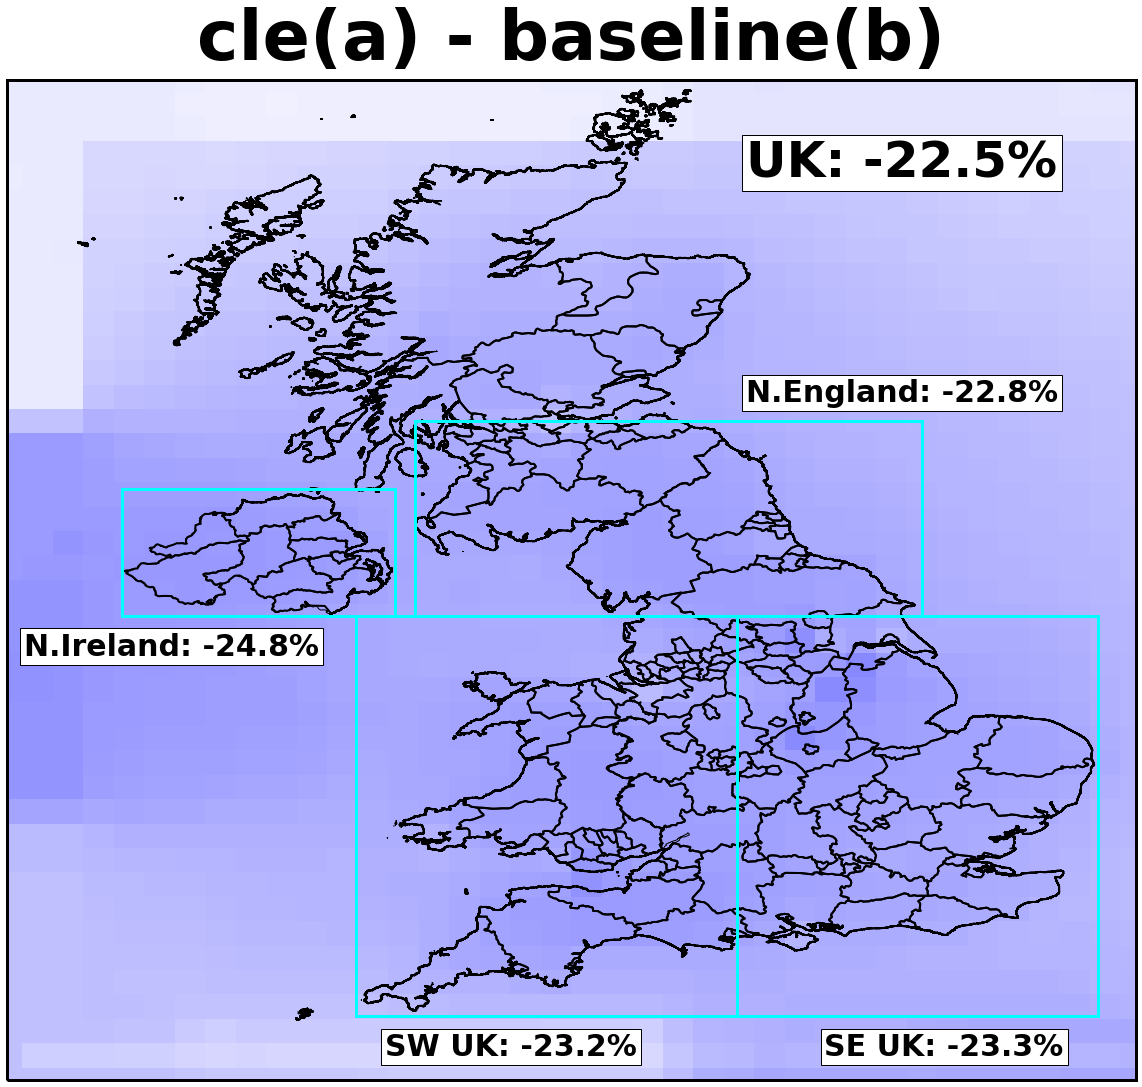

In [32]:
# the relative changes in PM2.5 at each grid between 2 data scenarios
PM25_change = (PM25_cle - PM25) / PM25 * 100
# display(PM25_change)

# customize the graph using the RC configuration file      
fig = plt.figure(figsize=[30,20])       
plt.rcParams["axes.unicode_minus"] = False  # the minus sign uses unicode encoding instead of a hyphen

# set the map domain
ax = plt.axes(projection=ccrs.PlateCarree())
box = [-9.375,3.75,49.25,59.5] 
ax.set_extent(box)
ax.add_geometries(UK_boundary.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none',zorder=1)
ax.add_geometries(UK_city.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none',linewidth=2,zorder=1)

# plot relative changes in PM2.5 from model
PM25_change.plot(ax=ax, cmap=plt.cm.get_cmap('bwr'),vmax=65,zorder=0)

# insert title and text
ax.set_title('cle(a) - baseline(b)',fontsize=70,weight='bold', pad=20)
ax.set(xlim=(-9.375,2.188))

# set your colorbar
PCM=ax.get_children()[2]
colorbar = plt.colorbar(PCM, ax=ax,orientation='horizontal',fraction=0.03, shrink=1,pad=0.05,extend = 'min')
colorbar.set_ticks([-60,-40,-20,0,+20,+40,+60])
colorbar.set_ticklabels(['{:.0f}%'.format(x) for x in [-60,-40,-20,0,+20,+40,+60]])
colorbar.ax.tick_params(labelsize=20) 
colorbar.ax.xaxis.label.set_size(30)

# set the border width globally
plt.rcParams['axes.linewidth'] = 3 

# remove the unwanted colorbar that comes by default
plt.delaxes(fig.axes[1])

start_lon =1.8
end_lon=1.8
start_lat=49.9
end_lat=54
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-8.2
end_lon=1.8
start_lat=54
end_lat=54
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-5.8
end_lon=1.8
start_lat=49.9
end_lat=49.9
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-5.8
end_lon=-5.8
start_lat=54
end_lat=49.9
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-1.9
end_lon=-1.9
start_lat=54
end_lat=49.9
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-8.2
end_lon=-8.2
start_lat=54
end_lat=55.3
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-8.2
end_lon=-5.4
start_lat=55.3
end_lat=55.3
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-5.4
end_lon=-5.4
start_lat=55.3
end_lat=54
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =-5.2
end_lon=-5.2
start_lat=54
end_lat=56
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =0
end_lon=0
start_lat=54
end_lat=56
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
start_lon =0
end_lon=-5.2
start_lat=56
end_lat=56
plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)

## sum all grids first before calculate the mean PM2.5 change
PM25_land_1=PM25_cle*GC_land["uk-mask"]
PM25_land_2=PM25*GC_land["uk-mask"]
PM25_land = (PM25_land_1.sum() - PM25_land_2.sum()) / PM25_land_2.sum() * 100
PM25_ire_1=PM25_cle*GC_ire["uk-mask"]
PM25_ire_2=PM25*GC_ire["uk-mask"]
PM25_ire = (PM25_ire_1.sum() - PM25_ire_2.sum()) / PM25_ire_2.sum() * 100
PM25_n_1=PM25_cle*GC_n["uk-mask"]
PM25_n_2=PM25*GC_n["uk-mask"]
PM25_n = (PM25_n_1.sum() - PM25_n_2.sum()) / PM25_n_2.sum() * 100
PM25_sw_1=PM25_cle*GC_sw["uk-mask"]
PM25_sw_2=PM25*GC_sw["uk-mask"]
PM25_sw = (PM25_sw_1.sum() - PM25_sw_2.sum()) / PM25_sw_2.sum() * 100
PM25_se_1=PM25_cle*GC_se["uk-mask"]
PM25_se_2=PM25*GC_se["uk-mask"]
PM25_se = (PM25_se_1.sum() - PM25_se_2.sum()) / PM25_se_2.sum() * 100

PM25_land=PM25_land.mean().values
PM25_ire= PM25_ire.mean().values
PM25_n= PM25_n.mean().values
PM25_sw= PM25_sw.mean().values
PM25_se= PM25_se.mean().values
PM25_land=('%.1f' %PM25_land)
PM25_ire=('%.1f' %PM25_ire)
PM25_n=('%.1f' %PM25_n)
PM25_sw=('%.1f' %PM25_sw)
PM25_se=('%.1f' %PM25_se)
ax.text(-1.8,58.5,f'UK: {PM25_land}%',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-9.2,53.6,f'N.Ireland: {PM25_ire}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-1.8,56.2,f'N.England: {PM25_n}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-1,49.5,f'SE UK: {PM25_se}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
ax.text(-5.5,49.5,f'SW UK: {PM25_sw}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))

# turn on this to save out without the legend
plt.delaxes(fig.axes[-1])

# turn on this to generate the legend only
# plt.delaxes(fig.axes[0])

# save the figure in png.
fig.savefig('D:/Jupyter code/PM output/cle_baseline_relative_changes.png', dpi=100, bbox_inches='tight')


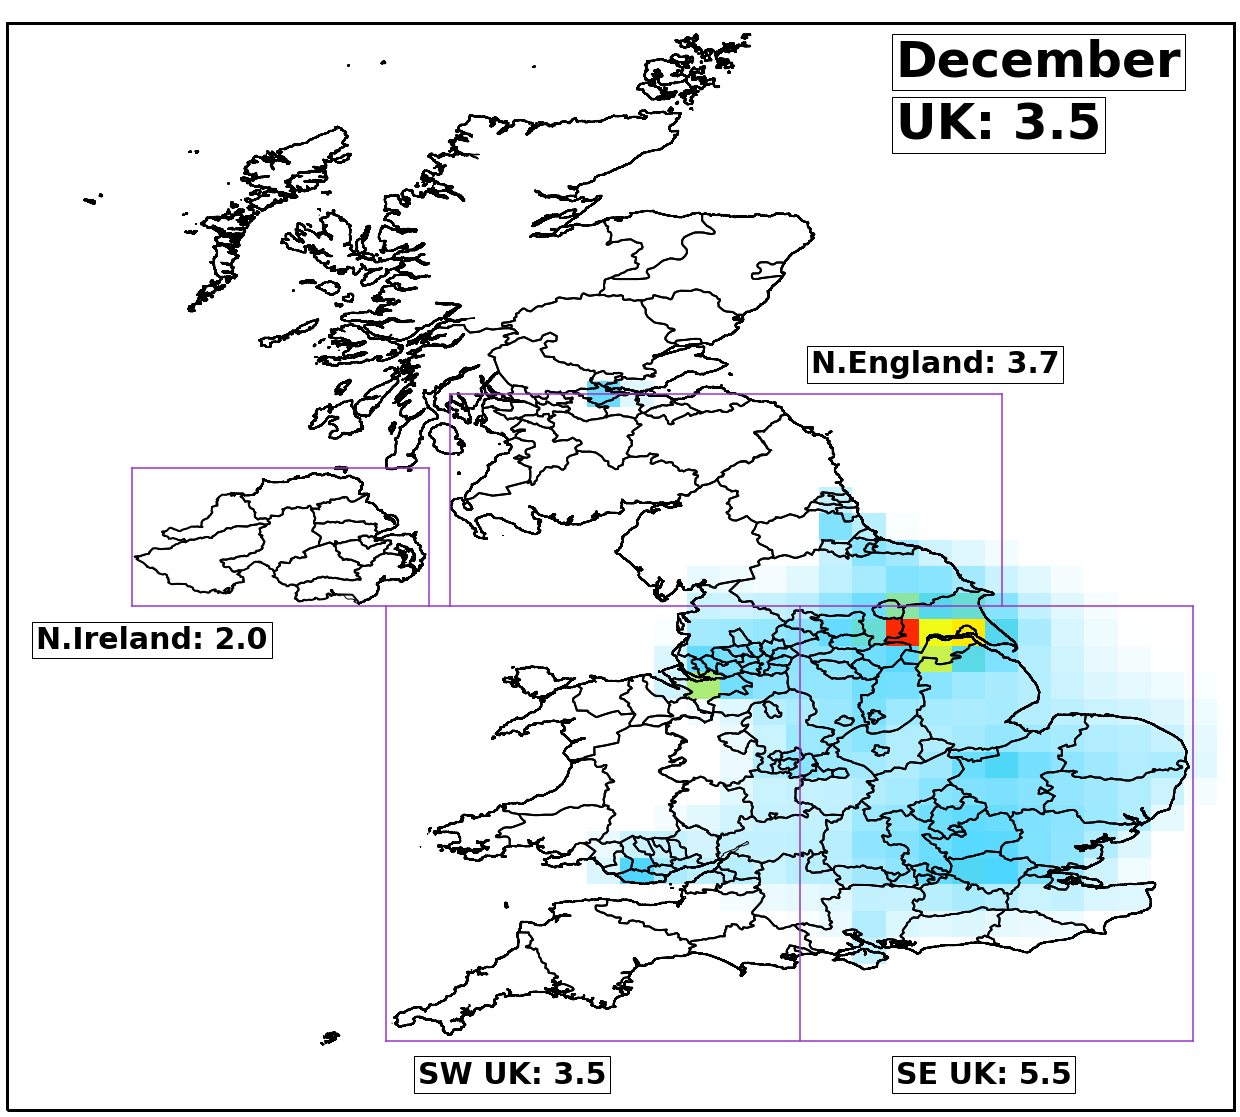

In [75]:
### show monthly PM2.5 in 3 scenarios

# change path
os.chdir("D:/Jupyter code/mtf_uk_nest")

# read data
Species  = sorted(glob.glob("GEOSChem.SpeciesConc*.nc4"))

# extract data fields from GC output files
Species  = [xr.open_dataset(file) for file in Species]

# define a function to plot monthly graph directly
def plot_layer_UK(m):
    """ input month"""
    # read data for m month in Specoes 
    SO4= Species[m-1]['SpeciesConc_SO4'].isel(time=0,lev=0) 
    NIT= Species[m-1]['SpeciesConc_NIT'].isel(time=0,lev=0) 
    NH4= Species[m-1]['SpeciesConc_NH4'].isel(time=0,lev=0) 
    BCPO= Species[m-1]['SpeciesConc_BCPO'].isel(time=0,lev=0)
    BCPI= Species[m-1]['SpeciesConc_BCPI'].isel(time=0,lev=0) 
    OCPO= Species[m-1]['SpeciesConc_OCPO'].isel(time=0,lev=0) 
    OCPI= Species[m-1]['SpeciesConc_OCPI'].isel(time=0,lev=0)
    SALA= Species[m-1]['SpeciesConc_SALA'].isel(time=0,lev=0) 
    DST1= Species[m-1]['SpeciesConc_DST1'].isel(time=0,lev=0) 
    DST2= Species[m-1]['SpeciesConc_DST2'].isel(time=0,lev=0) 
    SOAS= Species[m-1]['SpeciesConc_SOAS'].isel(time=0,lev=0)
    
    # parameters for concentration unit conversion 
    STP_P = 101325 # standard P
    STP_T = 293.    # standard T; 20 deg C
    ppm_mgm3 = 1/ 22.4 * 273 / STP_T* STP_P/ 101325  # 1μmol/mol = 1ppm = 1000ppb      1mol/mol = 1*10e3 mmol/mol  1ppm=1.0e-6mol/mol
    diag_MWs = [96.06, 62.01, 18.05, 12.01, 12.01, 12.01, 12.01, 31.4,29.0,29.0, 150.0]
    
    # convert unit for gases (dry mol/mol to μg/m3)
    SO4= 1 * 1.0e9 * SO4 * 96.06 * ppm_mgm3
    NIT= 1 * 1.0e9 * NIT * 62.01 * ppm_mgm3 
    NH4= 1 * 1.0e9 * NH4 * 18.05 * ppm_mgm3 
    BCPO= 1 * 1.0e9 * BCPO * 12.01 * ppm_mgm3 
    BCPI= 1 * 1.0e9 * BCPI * 12.01 * ppm_mgm3 
    OCPO= 1 * 1.0e9 * OCPO * 12.01 * ppm_mgm3 
    OCPI= 1 * 1.0e9 * OCPI * 12.01 * ppm_mgm3 
    SALA= 1 * 1.0e9 * SALA * 31.4 * ppm_mgm3 
    DST1= 1 * 1.0e9 * DST1 * 29.0 * ppm_mgm3 
    DST2= 1 * 1.0e9 * DST2 * 29.0 * ppm_mgm3 
    SOAS= 1 * 1.0e9 * SOAS * 150.0 * ppm_mgm3 
#     print(SO4)

    # calculate PM2.5
    PM25 = ( NH4 + NIT + SO4 ) * 1.35 + BCPI + BCPO +( OCPO + ( OCPI * 1.07 ) ) * 2.1 + \
    DST1 + DST2 * 0.30 + SALA * 1.86  + SOAS * 1.07
    
    # plot graph
    fig = plt.figure(figsize=[30,20])
    ax = plt.axes(projection=ccrs.PlateCarree()) 
    box = [-9.375,3.75,49.25,59.5] 
    ax.set_extent(box)
    ax.add_geometries(UK_boundary.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none', zorder=1)
    ax.add_geometries(UK_city.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none',linewidth=2, zorder=1)
    PM25.plot(ax=ax,cmap=WhGrYlRd,vmin=4,vmax=16,zorder=0)
    ax.set(xlim=(-9.375,2.188))
    
    # add area division lines
    start_lon =1.8
    end_lon=1.8
    start_lat=49.9
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-8.2
    end_lon=1.8
    start_lat=54
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-5.8
    end_lon=1.8
    start_lat=49.9
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-5.8
    end_lon=-5.8
    start_lat=54
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-1.9
    end_lon=-1.9
    start_lat=54
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-8.2
    end_lon=-8.2
    start_lat=54
    end_lat=55.3
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-8.2
    end_lon=-5.4
    start_lat=55.3
    end_lat=55.3
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-5.4
    end_lon=-5.4
    start_lat=55.3
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =-5.2
    end_lon=-5.2
    start_lat=54
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =0
    end_lon=0
    start_lat=54
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    start_lon =0
    end_lon=-5.2
    start_lat=56
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
    
    
    PM25_land= PM25*GC_land["uk-mask"]
    PM25_ire= PM25*GC_ire["uk-mask"]
    PM25_n= PM25*GC_n["uk-mask"]
    PM25_sw= PM25*GC_sw["uk-mask"]
    PM25_se= PM25*GC_se["uk-mask"]
    PM25_land=PM25_land.mean().values
    PM25_ire= PM25_ire.mean().values
    PM25_n= PM25_n.mean().values
    PM25_sw= PM25_sw.mean().values
    PM25_se= PM25_se.mean().values
    PM25_land=('%.1f' %PM25_land)
    PM25_ire=('%.1f' %PM25_ire)
    PM25_n=('%.1f' %PM25_n)
    PM25_sw=('%.1f' %PM25_sw)
    PM25_se=('%.1f' %PM25_se)
    ax.set_title(" ")
    ax.text(-1,58.4,f'UK: {PM25_land}',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-9.1,53.6,f'N.Ireland: {PM25_ire}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-1.8,56.2,f'N.England: {PM25_n}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-1,49.5,f'SE UK: {PM25_se}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-5.5,49.5,f'SW UK: {PM25_sw}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-1,59,'December',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    
    # set colorbar
#     PCM=ax.get_children()[2]
#     bounds = np.arange(4,16.25,0.25)
#     colorbar = plt.colorbar(PCM,ax=ax,label='($\mu$g m$^{-3}$)',orientation='vertical',fraction=0.05,shrink=1,pad=0.05,extend = 'both', boundaries=bounds)
#     colorbar.set_ticks([4,6,8,10,12,14,16])
#     colorbar.ax.tick_params(labelsize=30) 
#     colorbar.ax.yaxis.label.set_size(30)

#   # add lines to color bar
#     for x in np.array([4,6,8,10,12,14,16,18,20,22]):
#         colorbar.ax.axvline(x,ymin=0, ymax=1,linewidth=1, color='black')

    # set the border width globally
#     plt.rcParams['axes.linewidth'] = 3

    # turn on this to save out without the legend
    plt.delaxes(fig.axes[-1])
    # turn on this to generate the legend only
    # plt.delaxes(fig.axes[0])

    fig.savefig(f'D:/Jupyter code/PM output/mtf_uk_nest_seasonal_variation_{m}.png', dpi=100)
plot_layer_UK(12)  
        